Data Ingestion

In [32]:
import pandas as pd
df = pd.read_csv("sampled_data_1233455.csv")
df

,0,1,2,3,4,5,6,7,8
0,30228.807825,5726.607776,-1626.320538,2594.283280,-181.619500,256.127116,109.351607,-15.678304,0.0
1,-9497.739952,8278.174321,2034.127456,-511.525813,317.568984,-80.359330,49.041740,-31.012510,0.0
2,-7511.572988,3642.112362,3169.042072,260.688843,819.761801,347.922016,326.214732,-70.935662,1.0
3,-2743.438716,-2766.039532,1294.936448,8827.554325,562.691836,172.673028,15.054111,-36.559264,0.0
4,-7605.887024,3636.603699,1.207214,-458.728005,549.486223,152.111323,143.196036,76.668019,0.0
...,...,...,...,...,...,...,...,...,...
1295,30093.142045,5644.742674,1063.849597,-1020.700971,94.437812,-84.882753,123.286527,-7.985704,1.0
1296,-9536.139958,8281.644130,-163.546021,-480.070935,451.355562,18.280848,246.470821,10.116308,1.0
1297,-8420.323659,-16711.466980,3991.825057,-71.397743,334.218390,240.846200,353.989061,-13.290935,1.0
1298,17315.876450,-9740.002879,-273.551529,-247.322233,-534.131958,-299.489846,-108.443201,77.075580,0.0


Expolatory Data Analysis

In [23]:
df.shape

(1300, 9)

In [24]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,453.240011,-108.762191,10.942688,-41.286773,-15.175231,0.174367,6.547341,9.769198,0.490769
std,15501.302838,10846.188109,1977.989908,1477.500810,664.892816,259.143924,299.598960,272.284240,0.500107
min,-22538.305131,-20559.959981,-4844.286448,-1542.991828,-5757.158429,-732.276345,-1326.019986,-393.646249,0.000000
25%,-9495.085332,-9751.066445,-1392.524495,-558.293492,-204.592555,-118.088595,-126.388174,-27.484517,0.000000
50%,-7611.108070,3659.734697,-72.416493,-408.244630,62.804427,-26.217727,41.125171,-6.001491,0.000000
75%,5529.202597,5706.293771,1251.205676,-14.503875,317.354249,66.415427,155.748384,21.551645,1.000000
max,30302.750542,15095.859207,21506.113700,8997.886310,4017.278378,3744.167590,2520.774185,9177.662275,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1300 non-null   float64
 1   1       1300 non-null   float64
 2   2       1300 non-null   float64
 3   3       1300 non-null   float64
 4   4       1300 non-null   float64
 5   5       1300 non-null   float64
 6   6       1300 non-null   float64
 7   7       1300 non-null   float64
 8   8       1300 non-null   float64
dtypes: float64(9)
memory usage: 91.5 KB


Insight 1:
No Missing values

In [26]:
df["8"].value_counts()

0.0    662
1.0    638
Name: 8, dtype: int64

Insight 2:

Its a problem of binnary Classification. 

Number of (1) and Number of (2) are approximately same

No need to Balance the data via UpSampling or Down Sampling 

In [33]:
# Remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = df[~outliers]  


In [34]:
df_clean.shape

(798, 9)

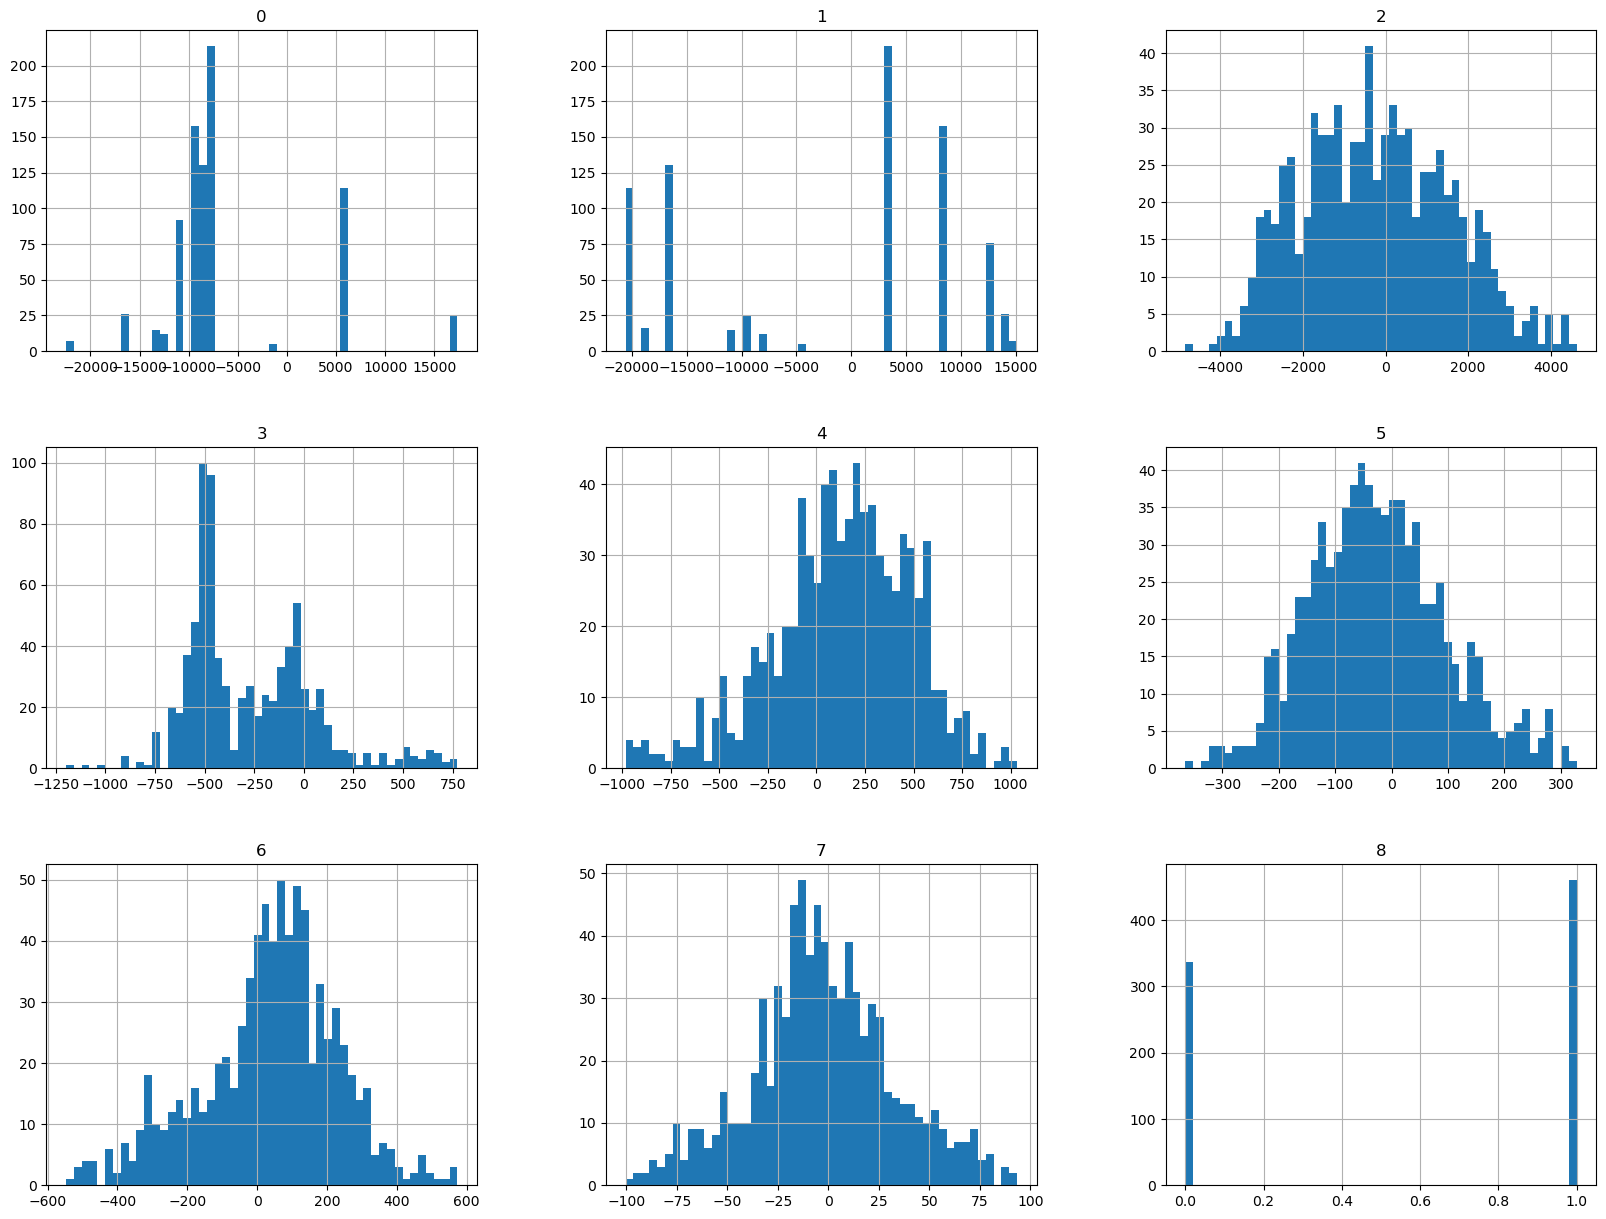

In [35]:
import matplotlib.pyplot as plt

# Plot histograms for each feature to understand distributions
df_clean.hist(bins=50, figsize=(20,15))
plt.show()


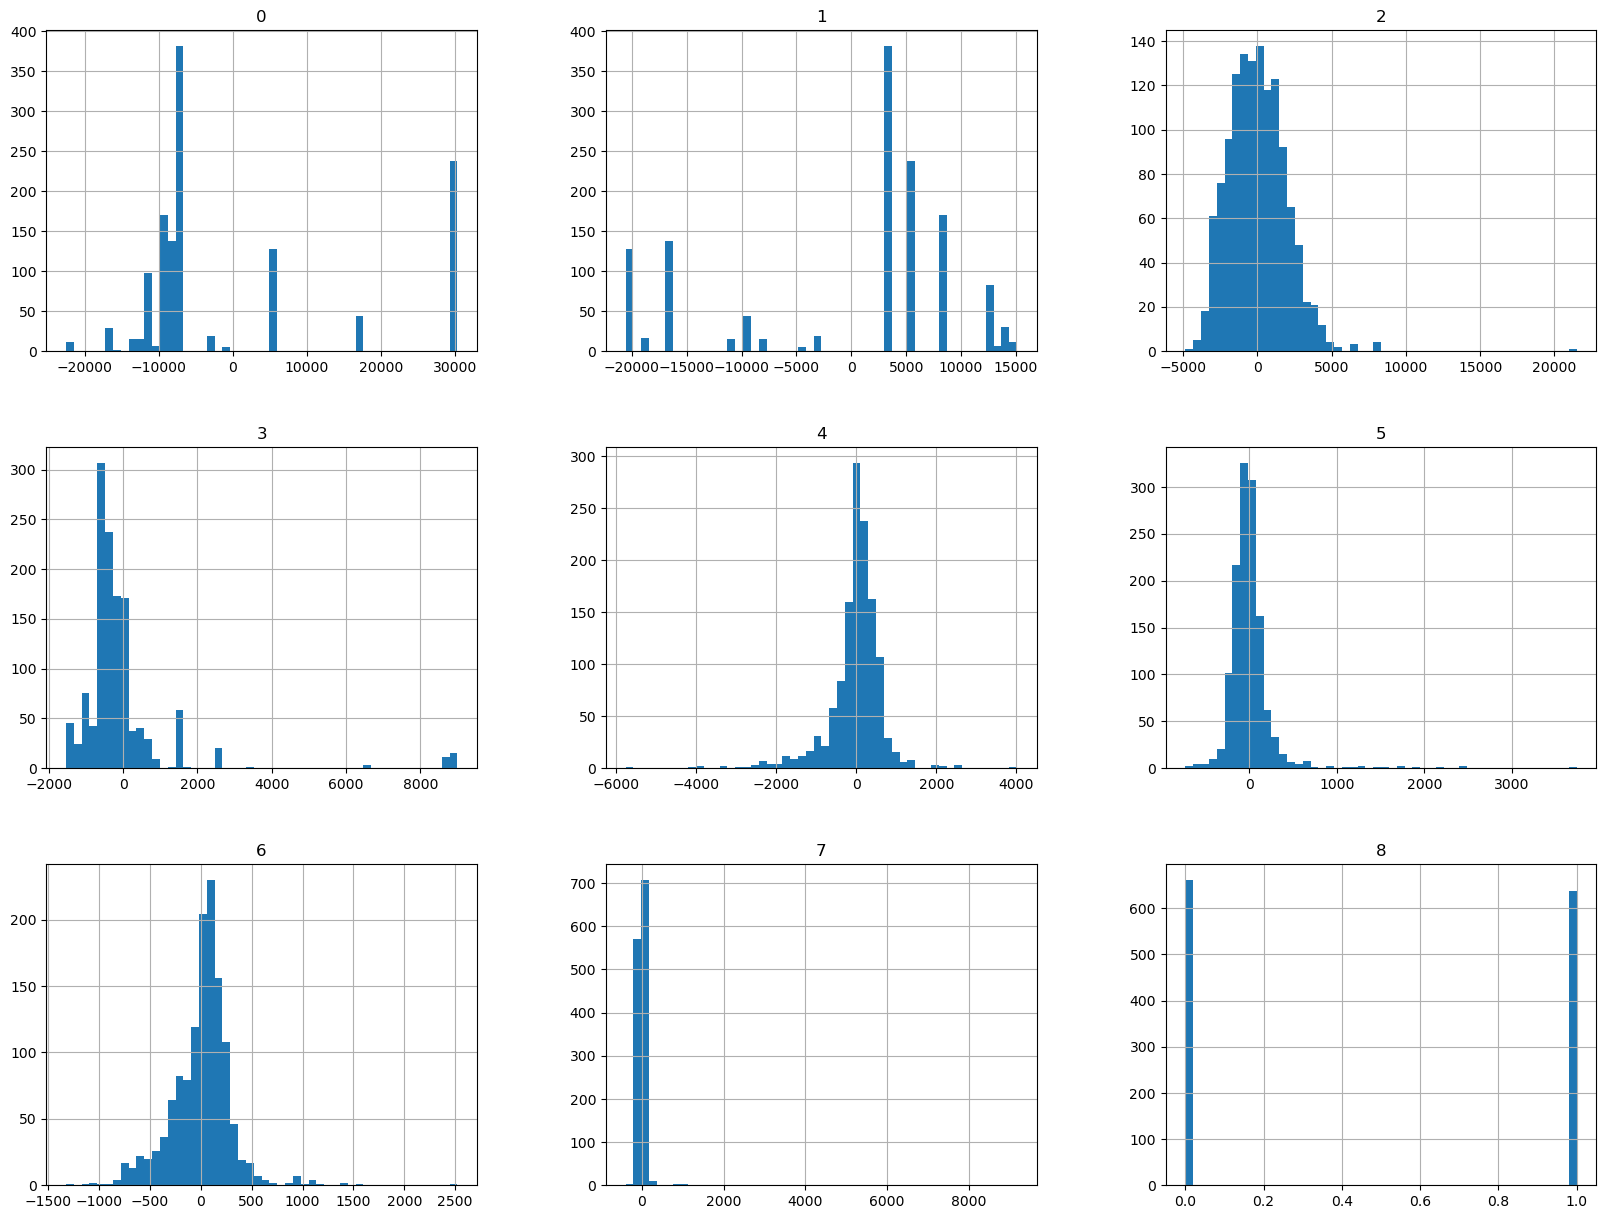

In [36]:
import matplotlib.pyplot as plt

# Plot histograms for each feature to understand distributions
df.hist(bins=50, figsize=(20,15))
plt.show()


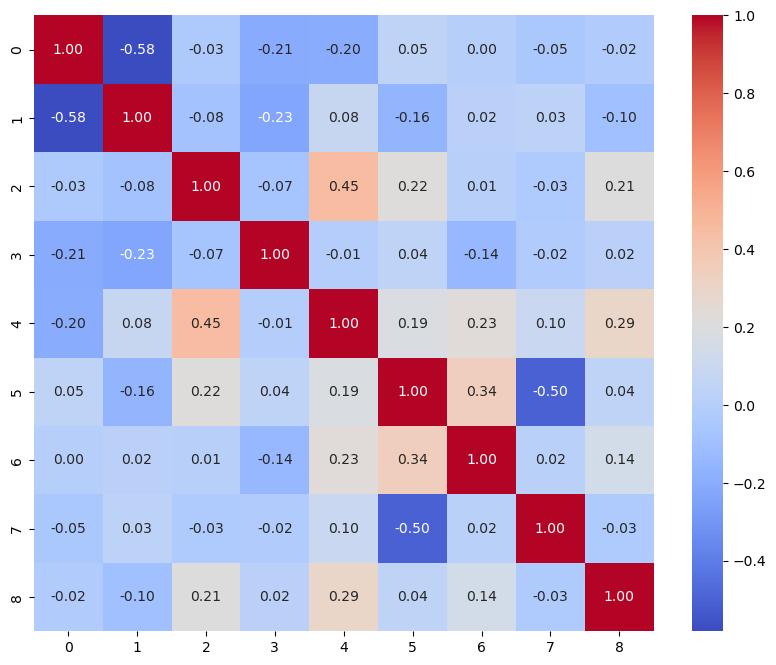

In [37]:
# Compute pairwise correlation of columns
import seaborn as sns
correlation_matrix = df_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Goal of Support Vector Machine is to Maximise the margin along thw plane

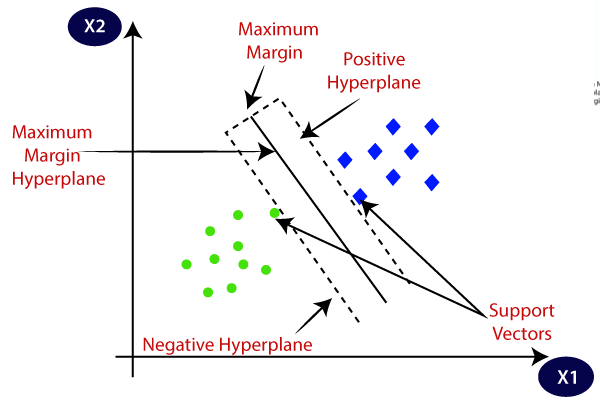


Trin Test Split

In [39]:
from sklearn.model_selection import train_test_split
features = ["1", "2", "3", "4", "5", "7"]
X = df_clean[features]
y = df_clean["8"]

# Perform train-test split (example using 80% train and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
import numpy as np
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler


In [41]:
# Define the dimension based on your features
dimension = X_train.shape[1]
feature_map = ZZFeatureMap(feature_dimension=dimension, reps=2, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

# Initialize QSVC
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Fit QSVC on the training data
qsvc.fit(X_train, y_train)

# Predict using the trained QSVC model
predictions = qsvc.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

# Predicting for both train and test data
train_predictions = qsvc.predict(X_train)
test_predictions = qsvc.predict(X_test)

# Generating confusion matrices
confusion_matrix_train = confusion_matrix(y_train, train_predictions)
confusion_matrix_test = confusion_matrix(y_test, test_predictions)

# Printing the confusion matrices
print("Confusion Matrix for Training Data:")
print(confusion_matrix_train)
print("\nConfusion Matrix for Testing Data:")
print(confusion_matrix_test)


Confusion Matrix for Training Data:
[[245  27]
 [  1 365]]

Confusion Matrix for Testing Data:
[[18 47]
 [24 71]]


In [44]:
from sklearn.metrics import classification_report

report_train = classification_report(y_train, train_predictions, target_names=['Class 0', 'Class 1'])

# Generate classification report for testing data
report_test = classification_report(y_test, test_predictions, target_names=['Class 0', 'Class 1'])

# Printing the classification reports
print("Classification Report for Training Data:")
print(report_train)

print("\nClassification Report for Testing Data:")
print(report_test)


Classification Report for Training Data:
              precision    recall  f1-score   support

     Class 0       1.00      0.90      0.95       272
     Class 1       0.93      1.00      0.96       366

    accuracy                           0.96       638
   macro avg       0.96      0.95      0.95       638
weighted avg       0.96      0.96      0.96       638


Classification Report for Testing Data:
              precision    recall  f1-score   support

     Class 0       0.43      0.28      0.34        65
     Class 1       0.60      0.75      0.67        95

    accuracy                           0.56       160
   macro avg       0.52      0.51      0.50       160
weighted avg       0.53      0.56      0.53       160

